# Bike Sharing Assignment

Bike Sharing Assignment using Multiple Linear Regression model

## The Problem Statement

A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 

## The Solution Steps

Here is the outline of steps of what we do in this notebook.

1. Understanding & Inspecting Data
2. Standardise Data
3. Data Visualization 
4. Data Preparation
5. Split Data into Train and Test
6. Building the MLR Models
7. Residual Analysis
8. Predictions on Test Data Using the Best Model
   - Results
9. Model Evaluation
   - Interpretation 
   - Recommendations

In [1]:
#Import the necessary libraries


import numpy as np                 #Get numpy library in the background   
import pandas as pd                #Get pandas library in the background
import matplotlib.pyplot as plt    #Get Matplotlib library for visualization
import seaborn as sns              #Get Seaborn library for visualization

import warnings                    #Import warnings to have some peace while you do the model-building
warnings.filterwarnings('ignore')  

### Note

Some other libraries are imported as and when required!

In [2]:
#Load the data and have a glance at it

bike = pd.read_csv('https://ml-course2-upgrad.s3.amazonaws.com/Linear+Regression+Assignment/Bike+Sharing+Assignment/day.csv')

# Step 1: Understanding Data

- Read data and have a look at it
- Get the shape of the bike data
- Describe the data
- Check for null values in this data

In [3]:
#Get the first five rows of this data

bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


### Comment

 - Firstly, the columns **instant** and **dteday** seem superfluous. So, let's drop them!
 - Secondly, the names of some columns look weird like the secret codes of Sherlock Holmes. Let's rechristen them  
   as well.

### Shape

A shape provides us the number of rows and columns

In [4]:
bike.shape

(730, 16)

### Describe 

**Describe** gives us values like counts, min, max, percentile values, etc.

In [5]:
bike.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


### Comment

**Describe** doesn't seem to be helpful here. Reason--all variables, numeric and categorical, are mixed up and we need to convert the binary values of categorical variables to strings.

### Info

**Info** gives columns, null values in them, and other information 

In [6]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


### Are there any null values in the data? Let's check it


In [7]:
bike.isnull().sum()  #Check null values in the data

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

### Comment

Breathe easy! There are no null values in the whole data!!

# Step 2: Standardise Data

In this step,let's change the following

- Remove the redundant columns
- Change the names of the columns or describe them in a note
- Change the numeric values to string names in categorical variables

### Remove these columns

We can remove the following columns: **instant**, **dteday**, **casual**, and **registered**. Why? These columns show themselves as superfluous!

In [8]:
bike.drop(['instant', 'dteday', 'casual', 'registered'], axis= 1, inplace=True) #We removed them with this code

In [9]:
#Now see the data again

bike.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


### Change the names of the columns or describe them

Here:
- **yr** is year
- **mnth** is month
- **weathersit** is weather situation
- **atemp** is _feels like_ Temperature 
- **hum** is humidity
- **cnt** is count

In [10]:
#Rename the columns

bike.rename(columns = {'yr': 'year', 'mnth':'month','hum':'humidity', 'cnt':'count'}, inplace=True)

In [11]:
bike.head()  #See the head of the data after renaming

,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,count
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


### Change values to strings 

In Categorical variables, change values to string names using **map**.

In [12]:
#Season

bike['season'] = bike['season'].map({1:'Spring', 2:'Summer', 3:'Fall', 4:'Winter'})


#Month

bike['month'] = bike['month'].map({1:'Jan', 2:'Feb', 3:'Mar', 4:'Apr', 5:'May', 6:'Jun', 7:'Jul', 8:'Aug', 9:'Sep', 10:'Oct', 11:'Nov', 12:'Dec'})

#Weekday

bike['weekday'] = bike['weekday'].map({0:'Sun', 1:'Mon', 2:'Tue', 3:'Wed', 4:'Thu', 5:'Fri', 6:'Sat'})

#Weather situation

bike['weathersit'] = bike['weathersit'].map({1:'Clear', 2:'Misty_Cloudy', 3:'Light_Snow', 4:'Heavy_Rain'})


bike.head()

,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,count
0,Spring,0,Jan,0,Sat,0,Misty_Cloudy,14.110847,18.18125,80.5833,10.749882,985
1,Spring,0,Jan,0,Sun,0,Misty_Cloudy,14.902598,17.68695,69.6087,16.652113,801
2,Spring,0,Jan,0,Mon,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,Spring,0,Jan,0,Tue,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,Spring,0,Jan,0,Wed,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


### Comment

Now the data looks clean and tidy!
Let's move on to the next step.

# Step 3: Data Visualization

Here, let's use various plots to visualize numerical variables and the categorical variables as well. And also, let's see how they are correlated to each other through heatmap.

Let's go first with numerical variables and the pairplots and glean some insights from them!


### Visualisation of numerical variables

we have **temp**, **atemp**, **humidity**, **windspeed**, and **count** as numerical variables in our bike data.

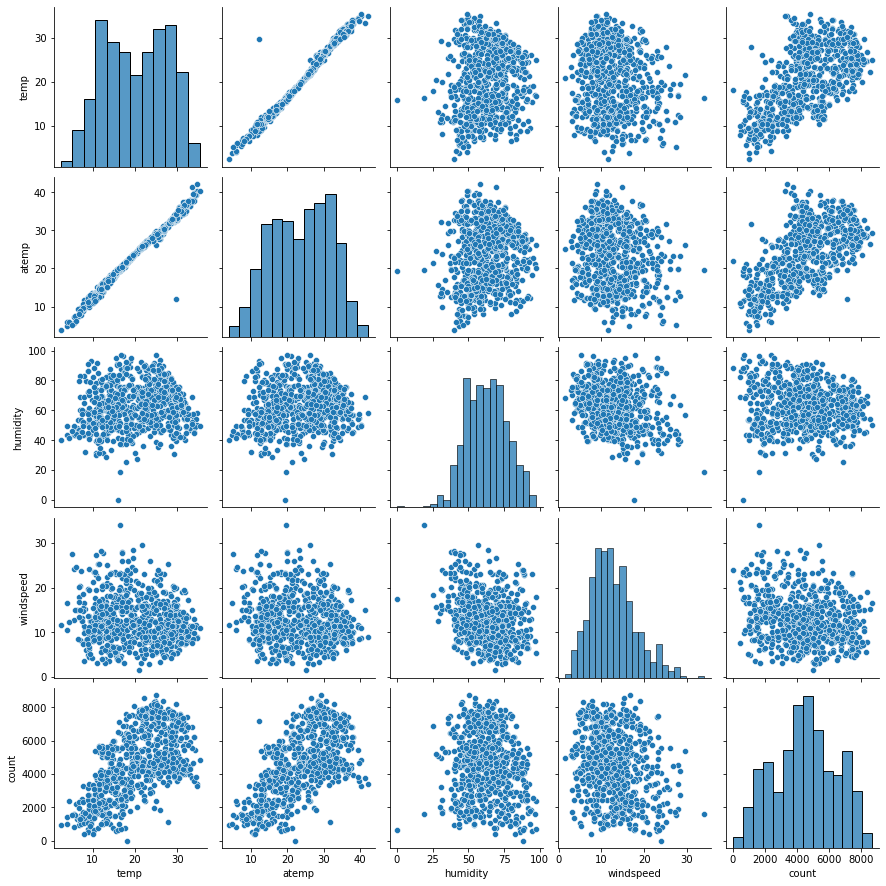

In [13]:
sns.pairplot(bike, vars = ['temp', 'atemp', 'humidity', 'windspeed', 'count']) #I am using Seaborn here for visualization
plt.show()   

### Insights

Let's center our understanding from the plots around the variable **count**. Because it's our **target** variable.

- It follows fairly a linear pattern against **temp** and **atemp**
- There are more bike rentals when humidity is between 50 and 75. That means, below 65 percent of humidity is 
  fairly comfortable to lend bike. Why 65 percent? I am assuming because even experts are in confusion. Some say 40 
  to 55 is comfortable. Some others say 30 to 60 percent is good condition.
- When **windspeed** is below 20, there is a huge demand for bikes. Why? You can't pedal a bike when the windspeed   is more than 25. Because windspeeds more than 25 tend to cause strong breezes and create _unfavorable weather_ 
  for riding bikes. (Windspeeds and their interpretation in terms of weather conditions from **National Weather 
  Service.**)




### Visualization of categorical variables

We have the following categorical variables like **season**, **year**, **month**, **weekday**, and **weathersituation** aka **weathersit**. 

Let's use boxplots and see what we can draw from the figures.

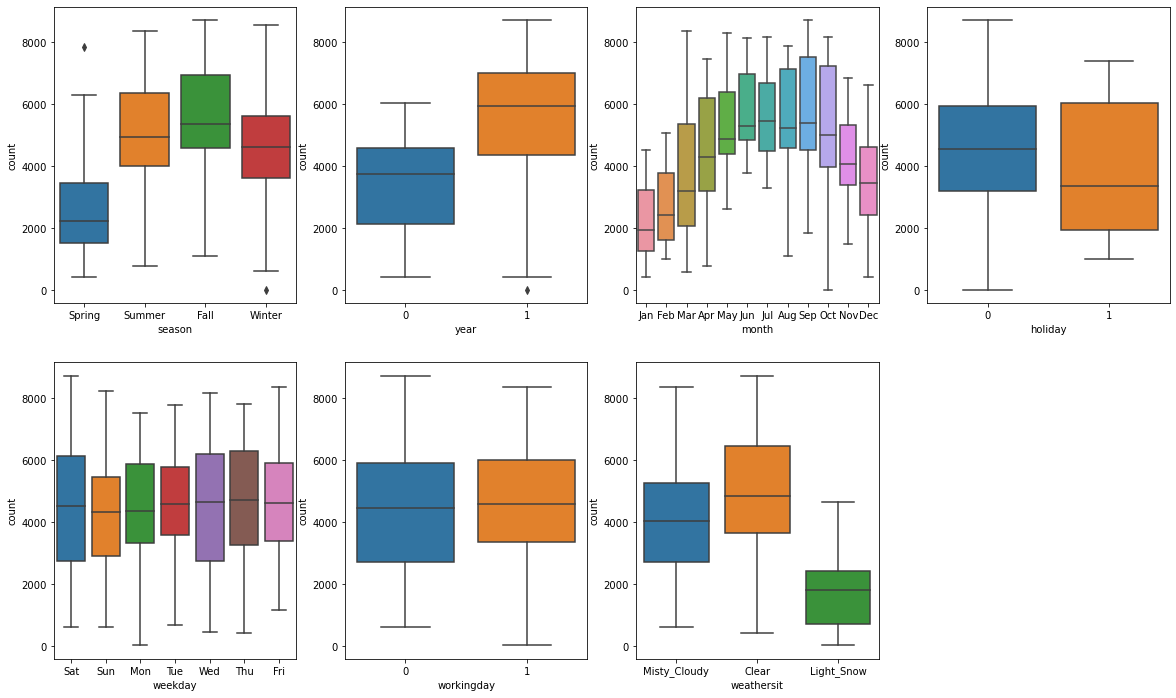

In [14]:
#Let's use boxplot for those variables

plt.figure(figsize = (20, 12))                         #Choose the figure size
plt.subplot(2, 4, 1)                                   #Two rows, four columns, the position of the choosen variable
sns.boxplot(x = 'season',  y = 'count', data = bike)   #The first cat. variable and repeat the same for all of them

plt.subplot(2, 4, 2)                                   
sns.boxplot(x = 'year',  y = 'count', data = bike)

plt.subplot(2, 4, 3)                                   
sns.boxplot(x = 'month',  y = 'count', data = bike)

plt.subplot(2, 4, 4)                                   
sns.boxplot(x = 'holiday',  y = 'count', data = bike)

plt.subplot(2, 4, 5)                                   
sns.boxplot(x = 'weekday',  y = 'count', data = bike)

plt.subplot(2, 4, 6)                                   
sns.boxplot(x = 'workingday',  y = 'count', data = bike)

plt.subplot(2, 4, 7)                                   
sns.boxplot(x = 'weathersit',  y = 'count', data = bike)

plt.show()

### Insights

We see some surprising insights in the plain sight itself.

- Bike rentals see more in numbers in the Fall months. And then followed by the Summer months. However, the warm   
  Spring months throw a surprise. Because these months are a little bit warm. But why no demand? The spring months   romantic to go for cycling, aren't they? Let's see. (**count** vs **season**)
- There's a steep increase in demand for the bikes in 2019. (**count** vs **year**)
- The demand for bikes is more on the weekend (Saturday) and mid-weekdays (Wednesday and Thursday)
- Moreover, **clear weather situation** makes things perfect for biking! 

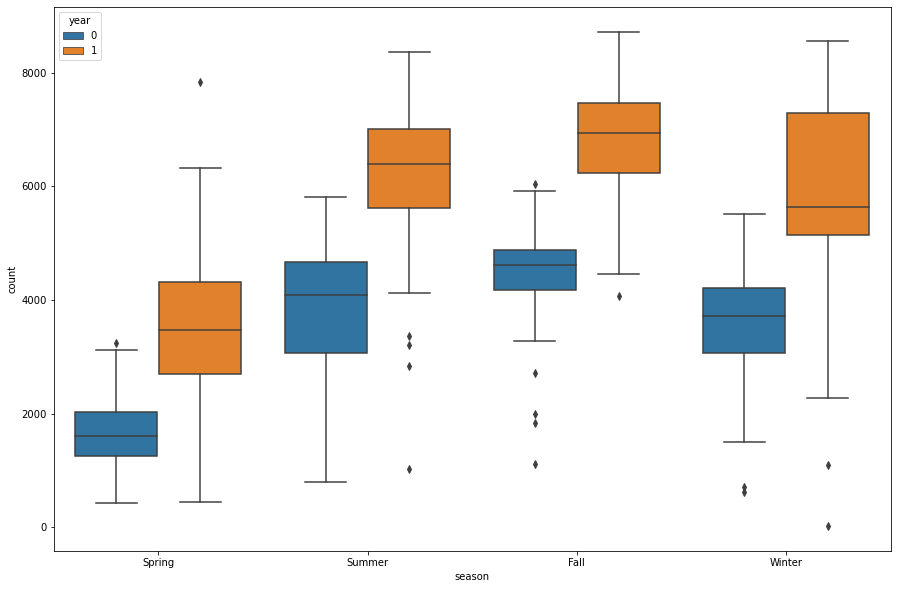

In [15]:
#Let's plot a figure for taking two categorical variables and a numerical one

plt.figure(figsize = (15, 10))                                     #See the figure size
sns.boxplot( x = 'season', y = 'count', hue = 'year', data = bike) #Taking the third variable as 'year'
plt.show()

### Comment

Clearly, the year 2019 dominates the scene with a huge surge in the demand for bikes.
However, we see some outliers here and there.

Now it's time to figure out how these variables are correlated to each other.
Let's see that through **Heat map**.

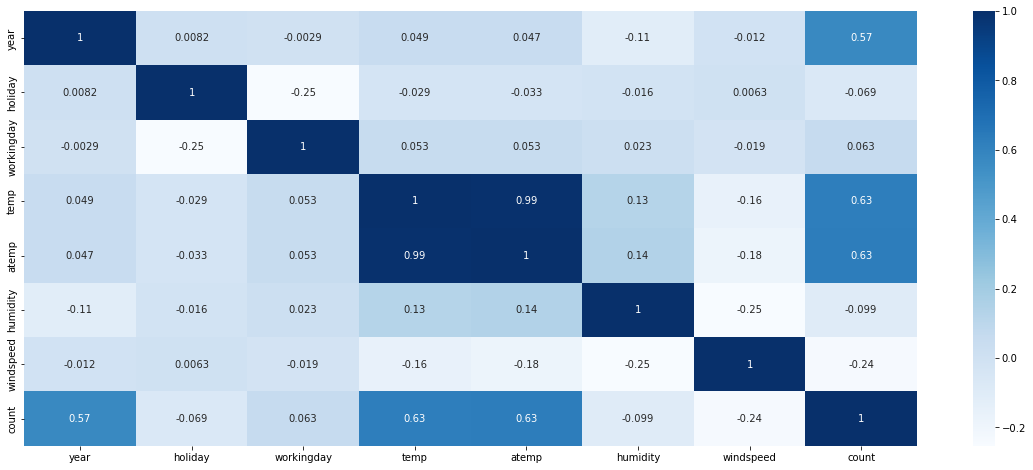

In [16]:
#Heatmap to understand the correlation among the variables

plt.figure(figsize=(20, 8))
sns.heatmap(bike.corr(), cmap = "Blues", annot=True)
plt.show()

### Comment

Since we have converted some of the categorical variables such as **season**, **year**, **month**, **weekday**, and **weathersit**, we only have those variables that numerical and categorical variable in binary values. 

Coming to the Heatmap:

- **temp** is highly correlated with the target variable **count**. That is, as temperature goes up, the demand for 
  the bikes go up as well
- Next, **count** and **year** are strongly correlated 
- **count** and **windspeed** are highly correlated as well, but negatively. That means, as the windspeed increases   the demand for the bikes go down and vice versa.



### Note

See that we have not mapped any string names to the values of the variables **holiday** and **workingday**.

# Step 4: Data Preparation 

We prepare the data to create dummies. See the steps we are going to do:

- Create **dummy variables**
- Drop the first row from the each dummy variable
- Concat them to the bike data

### Encoding

The process of creating dummy variables for a categorical variable is called **Encoding**. We use _get_dummies_ function from pandas to create them.

In [17]:
#Get dummies for the categorical variables

seasons = pd.get_dummies(bike['season'], drop_first=True)         #Dummy variables for Season
months = pd.get_dummies(bike['month'], drop_first=True)            #Dummy variables for Month
weekdays = pd.get_dummies(bike['weekday'], drop_first=True)        #Dummy variables for Week days
weathersits = pd.get_dummies(bike['weathersit'], drop_first=True)  #Dummy variables for Weather situation

### Why do we need to drop the first?

Simple. We reduce the first column of the dummy variables as the remaining columns are sufficient to explain the it. That is it reduces the **multicollinearity** among the dummy variables.



### Concat the dummies

Let's add these dummies to **bike** data by using **concat** from the pandas.

In [18]:
#Let's see the add these dummies to the main data, bike

bike = pd.concat([bike, seasons, months, weekdays, weathersits], axis = 1)

In [19]:
#Let's check the head of the bike data again

bike.head()

,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,...,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed,Light_Snow,Misty_Cloudy
0,Spring,0,Jan,0,Sat,0,Misty_Cloudy,14.110847,18.18125,80.5833,...,0,0,0,1,0,0,0,0,0,1
1,Spring,0,Jan,0,Sun,0,Misty_Cloudy,14.902598,17.68695,69.6087,...,0,0,0,0,1,0,0,0,0,1
2,Spring,0,Jan,0,Mon,1,Clear,8.050924,9.47025,43.7273,...,0,0,1,0,0,0,0,0,0,0
3,Spring,0,Jan,0,Tue,1,Clear,8.200000,10.60610,59.0435,...,0,0,0,0,0,0,1,0,0,0
4,Spring,0,Jan,0,Wed,1,Clear,9.305237,11.46350,43.6957,...,0,0,0,0,0,0,0,1,0,0


### Comment

The above data have 34 columns. Earlier we don't have these many columns, do we?
Now, we need to drop the columns like **season**, **month**, **weekday**, **weathersit**

In [20]:
#Now let's drop the some of the categorical variables

bike.drop(['season', 'month', 'weekday', 'weathersit', 'atemp'], axis =1, inplace=True)

### Note/Assumption

Dropping 'atemp' along with those above. Why? I assume that temp and 'atemp' or 'apparent temperature'have the same correlation with the target variable. Hence, say goodbye to it!

In [21]:
#See the head of the data after dropping those columns

bike.head()

,year,holiday,workingday,temp,humidity,windspeed,count,Spring,Summer,Winter,...,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed,Light_Snow,Misty_Cloudy
0,0,0,0,14.110847,80.5833,10.749882,985,1,0,0,...,0,0,0,1,0,0,0,0,0,1
1,0,0,0,14.902598,69.6087,16.652113,801,1,0,0,...,0,0,0,0,1,0,0,0,0,1
2,0,0,1,8.050924,43.7273,16.636703,1349,1,0,0,...,0,0,1,0,0,0,0,0,0,0
3,0,0,1,8.200000,59.0435,10.739832,1562,1,0,0,...,0,0,0,0,0,0,1,0,0,0
4,0,0,1,9.305237,43.6957,12.522300,1600,1,0,0,...,0,0,0,0,0,0,0,1,0,0


In [22]:
bike.shape  #Check the shape of the data

(730, 29)

In [23]:
bike.columns   #Have a glance at the new column names

Index(['year', 'holiday', 'workingday', 'temp', 'humidity', 'windspeed',
       'count', 'Spring', 'Summer', 'Winter', 'Aug', 'Dec', 'Feb', 'Jan',
       'Jul', 'Jun', 'Mar', 'May', 'Nov', 'Oct', 'Sep', 'Mon', 'Sat', 'Sun',
       'Thu', 'Tue', 'Wed', 'Light_Snow', 'Misty_Cloudy'],
      dtype='object')

# Step 5: Split Data into Train and Test

Now, we have come to a crucial stage.
We need to do the following:

- Import SciKitLearn (**sklearn**)
- Split the data into **train** and **test** datasets
- Scale the numerical variables
- Visualize the data

### Import sklearn and split the data

Also, we will check the shape of the datasets

In [24]:
#Import sklearn

from sklearn.model_selection import train_test_split   #Import train and test split
np.random.seed(0)

bike_train, bike_test = train_test_split(bike, train_size = 0.7, random_state = 100)
print(bike_train.shape)
print(bike_test.shape)       #Check the shape of train and test datasets

(510, 29)
(220, 29)


### Scale the numerical variables

Here, there are two ways of scaling variables. One Standardization and Normalization or MinMaxScale.
Why MinMaxScale?

- It preserve the shape of the original distribution 
- It doesn't neglect the importance of the outliers
- It values are between 0 and 1

Let's move on and do it!

In [25]:
#Import MinMaxScaler

from sklearn.preprocessing import MinMaxScaler   #Imported

scaler = MinMaxScaler()
num_vars = ['temp', 'humidity', 'windspeed', 'count']   #Numerical variable to be transformed/scaled

bike_train[num_vars]=scaler.fit_transform(bike_train[num_vars]) #scaling done

In [26]:
#Get the head for a glance

bike_train.head()

,year,holiday,workingday,temp,humidity,windspeed,count,Spring,Summer,Winter,...,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed,Light_Snow,Misty_Cloudy
576,1,0,1,0.815169,0.725633,0.264686,0.827658,0,0,0,...,0,0,0,0,0,0,1,0,0,0
426,1,0,0,0.442393,0.640189,0.255342,0.465255,1,0,0,...,0,0,0,1,0,0,0,0,0,1
728,1,0,0,0.245101,0.498067,0.663106,0.204096,1,0,0,...,0,0,0,0,1,0,0,0,0,0
482,1,0,0,0.395666,0.504508,0.188475,0.482973,0,1,0,...,0,0,0,1,0,0,0,0,0,1
111,0,0,1,0.345824,0.751824,0.380981,0.191095,0,1,0,...,0,0,0,0,0,0,0,0,0,1


It looks cools, doesn't it?

In [27]:
#Describe train data

bike_train.describe()

,year,holiday,workingday,temp,humidity,windspeed,count,Spring,Summer,Winter,...,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed,Light_Snow,Misty_Cloudy
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.676471,0.537440,0.650480,0.320883,0.513499,0.243137,0.247059,0.247059,...,0.084314,0.080392,0.150980,0.154902,0.143137,0.133333,0.131373,0.158824,0.029412,0.345098
std,0.500429,0.157763,0.468282,0.225858,0.145846,0.169803,0.224421,0.429398,0.431725,0.431725,...,0.278131,0.272166,0.358381,0.362166,0.350557,0.340268,0.338139,0.365870,0.169124,0.475867
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.538643,0.199179,0.356420,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.542596,0.653714,0.296763,0.518638,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.754830,0.414447,0.684710,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Comment

Did you observe something from the above table? Since we've applied MinMaxScaler, the Max value is 1 and the Min value is 0.

### Visualize train data

We use the Heatmap and Scatter plots

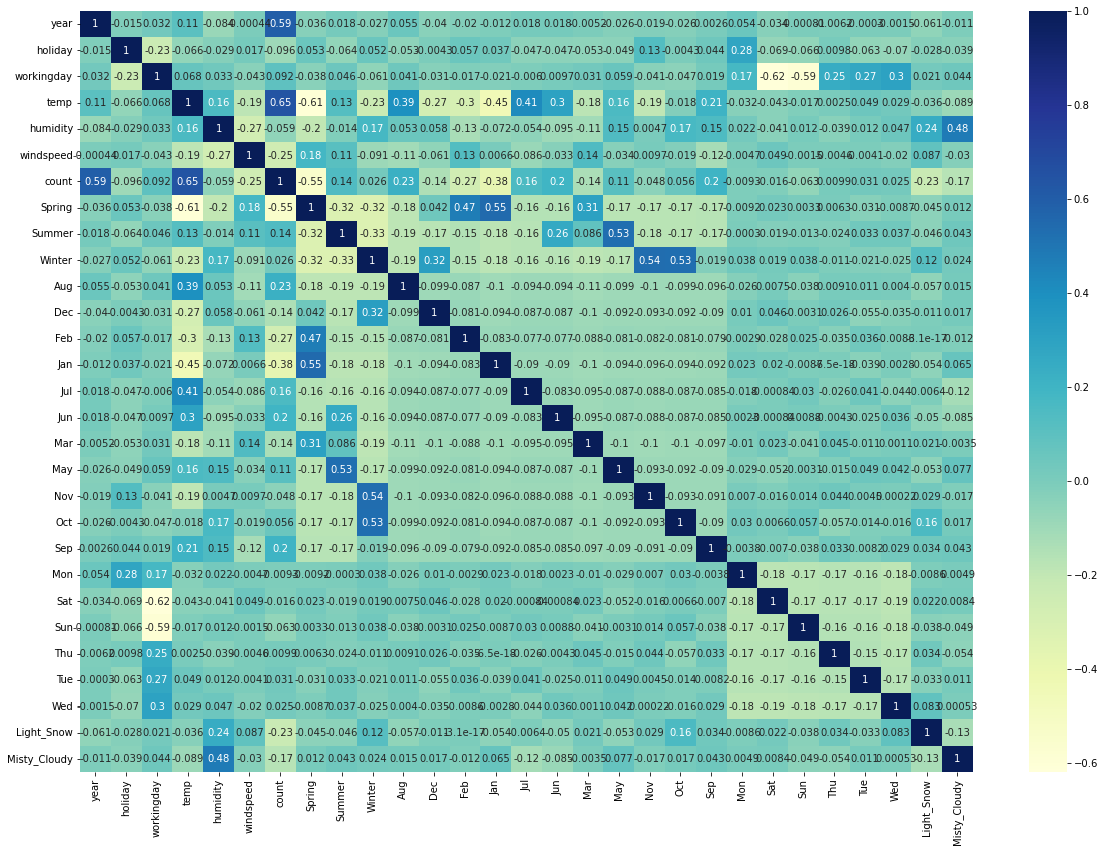

In [28]:
plt.figure(figsize = (20, 14))                                 #Get your figure size
sns.heatmap(bike_train.corr(), cmap = "YlGnBu", annot=True)    #Heatmap for bike train data set
plt.show()

### Comment

Ahh, that's so many numbers! We see a strong correlation of **temp**, **year**, and **aug** (which falls close to the Fall months) with the target variable **count**.

# Step 6: Building the MLR Models

What we do here is:

- Split X and y from the bike train dataset
- We need to select the features using **RFE** from **sklearn**

Let's see them as we build the model

In [29]:
#Sending count to y

y_train = bike_train.pop('count')    #That means we make 'count' as a dependent variable
X_train = bike_train


In [30]:
#Get Recusive Feature Elimination (RFE) on board

from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(estimator = lm, n_features_to_select =15)             #Run the RFE
rfe = rfe.fit(X_train, y_train)

In [31]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))         #Get the variable RFE has selected

[('year', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('humidity', True, 1),
 ('windspeed', True, 1),
 ('Spring', False, 7),
 ('Summer', True, 1),
 ('Winter', True, 1),
 ('Aug', True, 1),
 ('Dec', False, 5),
 ('Feb', False, 3),
 ('Jan', False, 2),
 ('Jul', False, 12),
 ('Jun', False, 8),
 ('Mar', False, 13),
 ('May', False, 4),
 ('Nov', False, 6),
 ('Oct', True, 1),
 ('Sep', True, 1),
 ('Mon', False, 9),
 ('Sat', True, 1),
 ('Sun', True, 1),
 ('Thu', False, 11),
 ('Tue', False, 10),
 ('Wed', False, 14),
 ('Light_Snow', True, 1),
 ('Misty_Cloudy', True, 1)]

### Comment

- The best selected features are ranked as 1
- Now, let's remove the features ranked ot

In [32]:
#Let's display the columns of the bike train dataset

col = X_train.columns[rfe.support_]
col

Index(['year', 'holiday', 'workingday', 'temp', 'humidity', 'windspeed',
       'Summer', 'Winter', 'Aug', 'Oct', 'Sep', 'Sat', 'Sun', 'Light_Snow',
       'Misty_Cloudy'],
      dtype='object')

### Insight

Did you see something? The columns displayed in the above are selected by the RFE.

Now let's remove all those columns that RFE marks as **False** and continue building the model.

In [33]:
X_train.columns[~rfe.support_]

Index(['Spring', 'Dec', 'Feb', 'Jan', 'Jul', 'Jun', 'Mar', 'May', 'Nov', 'Mon',
       'Thu', 'Tue', 'Wed'],
      dtype='object')

In [34]:
#Now let's import the statsmodels and build the model further with RFE-selected columns

X_train_rfe = X_train[col]

In [35]:
#Import statsmodels

import statsmodels.api as sm

X_train_rfe = sm.add_constant(X_train_rfe)

Hey, you know? We add constant to the model so that LR model doesn't start from the origin!

In [36]:
#Let's get the OLS

lm = sm.OLS(y_train, X_train_rfe).fit()

In [37]:
#Now let's have the linear model summary

print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     196.6
Date:                Sun, 14 Aug 2022   Prob (F-statistic):          8.70e-192
Time:                        17:31:41   Log-Likelihood:                 518.52
No. Observations:                 510   AIC:                            -1007.
Df Residuals:                     495   BIC:                            -943.5
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1640      0.022      7.507   

### Insights

The first things first:
- **R-squared** is about 84 percent. That means, the model covers about the 84 percent of the bike train dataset.
- **Adj. R-squared** is more or less the same as **R-squared**
- **Prob(F_statistic)** is very very close to zero. So null-hypothesis is true! That is, the regression equation 
  has some validity in fitting the data.
- **holiday** has the highest p-value, which more than *0.05*. And the rest of them are zero!



### Variance Inflation Factor (VIF)

The VIF is important to calculate in building the model. So what's importance? It quantitatively tells us how the features are correlated. Neglect the values whose **VIF is more than 10**. Stricly-speaking, in some cases, **ignore features more than 5**. 

In [38]:
#Ignore the constant by dropping it

X_train_rfe = X_train_rfe.drop(['const'], axis = 1)

In [39]:
#Get the VIF from the statsmodels

from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_rfe
vif['features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range (X.shape[1])]  #Get VIF
vif['VIF'] = round(vif['VIF'], 2)                                                  #Round off VIF
vif = vif.sort_values(by = "VIF", ascending = False)                               #Sort the values in ascending order
vif

,features,VIF
2,workingday,31.45
11,Sat,7.77
12,Sun,7.65
1,holiday,2.14
4,humidity,1.87
7,Winter,1.71
3,temp,1.59
14,Misty_Cloudy,1.56
9,Oct,1.49
8,Aug,1.46


### Insights

In the model, **holiday** has the highest **p-value** and the VIF values less than 5. So let's remove it.

## Model 1

Rebuilding the model by deleting **holiday**

In [40]:
#Let's drop holiday

X_train_n1 = X_train_rfe.drop(['holiday'], axis = 1)  #It's gone!

In [41]:
import statsmodels.api as sm

X_train_lm1 = sm.add_constant(X_train_n1)            #Add constant to the new model called lm1

In [42]:
model1 = sm.OLS(y_train, X_train_lm1).fit()              #Get the lm1
print(model1.summary())                                     #Display the summary of lm1

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     196.6
Date:                Sun, 14 Aug 2022   Prob (F-statistic):          8.70e-192
Time:                        17:31:48   Log-Likelihood:                 518.52
No. Observations:                 510   AIC:                            -1007.
Df Residuals:                     495   BIC:                            -943.5
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1391      0.036      3.859   

In [43]:
#Drop the constant

X_train_lm1 = X_train_lm1.drop(['const'], axis = 1)

In [44]:
vif = pd.DataFrame()                                              #We gotta new VIF for the new model!
X = X_train_n1
vif['features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range (X.shape[1])]  #Get VIF
vif['VIF'] = round(vif['VIF'], 2)                                                  #Round off VIF
vif = vif.sort_values(by = "VIF", ascending = False)                               #Sort the values in ascending order
vif

,features,VIF
3,humidity,25.23
1,workingday,15.51
2,temp,10.33
4,windspeed,4.35
10,Sat,4.21
11,Sun,4.15
6,Winter,2.25
13,Misty_Cloudy,2.22
0,year,2.05
5,Summer,1.83


### Insights

**humidity** has the high **VIF** value. Sack it!


## Model 2

Rebuilding the model second time

In [45]:
X_train_n2 = X_train_lm1.drop(['humidity'], axis = 1)    #humidity dropped

In [46]:
#Get new model

X_train_lm2 = sm.add_constant(X_train_n2)            #Add constant to the new model called lm2
model2 = sm.OLS(y_train, X_train_lm2).fit()             #Get the lm2
print(model2.summary())                                 #Display the summary of lm2

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     201.8
Date:                Sun, 14 Aug 2022   Prob (F-statistic):          1.97e-188
Time:                        17:31:51   Log-Likelihood:                 507.76
No. Observations:                 510   AIC:                            -987.5
Df Residuals:                     496   BIC:                            -928.2
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0396      0.029      1.344   

### Comment

Model 2 has the pretty decent R-squared value

In [47]:
#Drop the constant

X_train_lm2 = X_train_lm2.drop(['const'], axis = 1)

In [48]:
vif = pd.DataFrame()                                              #We gotta new VIF for the new model!
X = X_train_n2
vif['features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range (X.shape[1])]  #Get VIF
vif['VIF'] = round(vif['VIF'], 2)                                                  #Round off VIF
vif = vif.sort_values(by = "VIF", ascending = False)                               #Sort the values in ascending order
vif

,features,VIF
1,workingday,9.01
2,temp,8.87
3,windspeed,4.35
9,Sat,2.81
10,Sun,2.64
5,Winter,2.10
0,year,2.05
4,Summer,1.83
6,Aug,1.60
7,Oct,1.60


**Oct** has a high **p-value** and low **VIF**. So let's drop it and update the model.

## Model 3

Rebuild the model by dropping out **Oct**. 

In [49]:
X_train_n3 = X_train_lm2.drop(['Oct'], axis=1)   #Dropping the Oct variable

In [50]:
#Get new model

X_train_lm3 = sm.add_constant(X_train_n3)            #Add constant to the new model called model3
model3 = sm.OLS(y_train, X_train_lm3).fit()             #Get the model3
print(model3.summary())                                 #Display the summary of model3

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     217.0
Date:                Sun, 14 Aug 2022   Prob (F-statistic):          8.64e-189
Time:                        17:31:56   Log-Likelihood:                 505.81
No. Observations:                 510   AIC:                            -985.6
Df Residuals:                     497   BIC:                            -930.6
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0343      0.029      1.164   

### Comment

- **R-squared** values is around 84 percent
- All **p-values** are within the acceptable range (**<0.05**)

In [51]:
#Drop the constant

X_train_lm3 = X_train_lm3.drop(['const'], axis = 1)

In [52]:
vif = pd.DataFrame()                                                               #We gotta new VIF for the new model!
X = X_train_n3
vif['features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range (X.shape[1])]  #Get VIF
vif['VIF'] = round(vif['VIF'], 2)                                                  #Round off VIF
vif = vif.sort_values(by = "VIF", ascending = False)                               #Sort the values in ascending order
vif

,features,VIF
1,workingday,8.91
2,temp,8.61
3,windspeed,4.35
8,Sat,2.79
9,Sun,2.64
0,year,2.05
4,Summer,1.82
5,Winter,1.61
6,Aug,1.59
11,Misty_Cloudy,1.59


### Comment

- **temp** has a VIF slightly over 5. But we're not gonna drop it!
- So let's drop **workingday**. Even though the acceptable range for VIF value is below 10. Let's try and see by  
  dropping it.

## Model 4

So by dropping **workingday**, we make a new model!

In [53]:
X_train_n4=X_train_lm3.drop(['workingday'], axis=1)   #Workingday dropped!

In [54]:
#Get new model

X_train_lm4 = sm.add_constant(X_train_n4)            #Add constant to the new model called model4
model4 = sm.OLS(y_train, X_train_lm4).fit()             #Get the model4
print(model4.summary())                                 #Display the summary of model4

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     228.6
Date:                Sun, 14 Aug 2022   Prob (F-statistic):          1.17e-186
Time:                        17:32:01   Log-Likelihood:                 497.94
No. Observations:                 510   AIC:                            -971.9
Df Residuals:                     498   BIC:                            -921.1
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1303      0.017      7.737   

### Comment

**Sat** has a high p-value. More than the acceptable range!

In [55]:
#Drop the constant

X_train_lm4 = X_train_lm4.drop(['const'], axis = 1)

In [56]:
X_train_lm4.columns

Index(['year', 'temp', 'windspeed', 'Summer', 'Winter', 'Aug', 'Sep', 'Sat',
       'Sun', 'Light_Snow', 'Misty_Cloudy'],
      dtype='object')

In [57]:
vif = pd.DataFrame()                                                               #We gotta new VIF for the new model!
X = X_train_n4
vif['features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range (X.shape[1])]  #Get VIF
vif['VIF'] = round(vif['VIF'], 2)                                                  #Round off VIF
vif = vif.sort_values(by = "VIF", ascending = False)                               #Sort the values in ascending order
vif

,features,VIF
1,temp,5.12
2,windspeed,3.18
0,year,2.00
3,Summer,1.81
5,Aug,1.58
4,Winter,1.49
10,Misty_Cloudy,1.49
6,Sep,1.31
7,Sat,1.21
8,Sun,1.19


No high VIF values! But **Sat** has high p-value. So let's update the model by dropping it!

## Model 5

Rebuilding the model by **Sat** dropping it!

In [58]:
X_train_n5=X_train_lm4.drop(['Sat'], axis =1)   #Sat dropped!

In [59]:
X_train_n5.columns    #Updated columns

Index(['year', 'temp', 'windspeed', 'Summer', 'Winter', 'Aug', 'Sep', 'Sun',
       'Light_Snow', 'Misty_Cloudy'],
      dtype='object')

In [60]:
#Get new model

X_train_lm5 = sm.add_constant(X_train_n5)            #Add constant to the new model called model5
model5 = sm.OLS(y_train, X_train_lm5).fit()             #Get the model5
print(model5.summary())                                 #Display the summary of model5

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     251.1
Date:                Sun, 14 Aug 2022   Prob (F-statistic):          1.59e-187
Time:                        17:32:22   Log-Likelihood:                 497.12
No. Observations:                 510   AIC:                            -972.2
Df Residuals:                     499   BIC:                            -925.7
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1330      0.017      7.958   

p-values are within acceptable range!

In [61]:
#Drop the constant

#X_train_lm5 = X_train_lm5.drop(['const'], axis = 1)

In [62]:
vif = pd.DataFrame()                                                               #We gotta new VIF for the new model!
X = X_train_n5
vif['features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range (X.shape[1])]  #Get VIF
vif['VIF'] = round(vif['VIF'], 2)                                                  #Round off VIF
vif = vif.sort_values(by = "VIF", ascending = False)                               #Sort the values in ascending order
vif

,features,VIF
1,temp,5.09
2,windspeed,3.10
0,year,2.00
3,Summer,1.81
5,Aug,1.58
4,Winter,1.49
9,Misty_Cloudy,1.49
6,Sep,1.31
7,Sun,1.16
8,Light_Snow,1.08


### Insights

The model 5 looks pretty good!
- No **p-values** above **0.05**
- No high VIF values. Though **temp** has VIF slightly over 5. In general, the VIF values should be below 10 as a  
  convention. So we are no way going to drop the **temp** variable.
- Talking about **R-squared and Adj. R-squared values**, they model explains about 83 percent of data! So that's a   pretty good model, I believe

# Step 7: Residual Analysis

Let's carry out the residual analysis on the train data. By the way, what are residuals? The residuals are nothing but leftover or errors. Statistically-speaking, they are difference of the obeserved and predicted data. The larger the errors are, the lesser reliable a linear regression is!

We carry the following assumptions for multiple linear regression (MLR):

1. The residuals (or, errors) observe the Normal Distribution 
2. The errors are independent i.e. there is no multicollinearity among them
3. The residuals follow the constant variance i.e. homoscedasticity


Let's move on!

### The residuals observe the Normal Distribution

In [63]:
#See the head of model4

X_train_lm5.head()

,const,year,temp,windspeed,Summer,Winter,Aug,Sep,Sun,Light_Snow,Misty_Cloudy
576,1.0,1,0.815169,0.264686,0,0,0,0,0,0,0
426,1.0,1,0.442393,0.255342,0,0,0,0,0,0,1
728,1.0,1,0.245101,0.663106,0,0,0,0,1,0,0
482,1.0,1,0.395666,0.188475,1,0,0,0,0,0,1
111,1.0,0,0.345824,0.380981,1,0,0,0,0,0,1


In [64]:
#X_train_lm5 shape

X_train_lm5.shape

(510, 11)

In [65]:
y_train_pred = model5.predict(X_train_lm5)

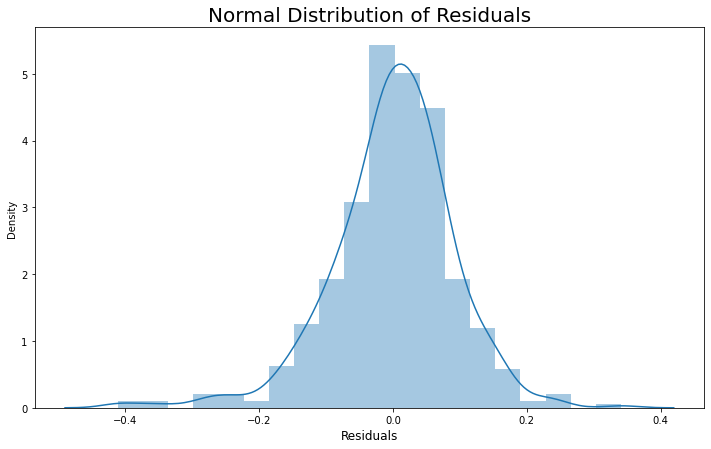

In [66]:
plt.figure(figsize=(12,7))                                    #Plotting the histogram of errors
sns.distplot((y_train-y_train_pred), bins=20)
plt.title("Normal Distribution of Residuals", fontsize=20)    #Setting the title of the plot
plt.xlabel("Residuals", fontsize=12)                          #Give the name of the X-label
plt.show()

How beautiful! The residuals (or, errors) are perfectly following the Normal Distribution.
So the errors fulfil one of our assumptions of multiple linear regression.

# Step 8: Predictions on Test Data Using the Best Model

Here we use **Model 5** to make predictions on the test data.

Steps:

1. Transform the variables
2. Divide X_test and y_test
3. Add constant to X_test
4. Predict y_test_pred
4. Get $r^2$ value

In [67]:
#Create num variables 

num_vars = ['temp', 'humidity', 'windspeed', 'count']   #Numerical variable to be transformed/scaled

bike_test[num_vars]=scaler.transform(bike_test[num_vars]) #scaling done

In [68]:
bike_test.head()   #See the head of the test data

,year,holiday,workingday,temp,humidity,windspeed,count,Spring,Summer,Winter,...,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed,Light_Snow,Misty_Cloudy
184,0,1,0,0.831783,0.657364,0.084219,0.692706,0,0,0,...,0,0,1,0,0,0,0,0,0,1
535,1,0,1,0.901354,0.610133,0.153728,0.712034,0,1,0,...,0,0,0,0,0,0,0,1,0,0
299,0,0,1,0.511964,0.837699,0.334206,0.303382,0,0,1,...,1,0,0,0,0,1,0,0,0,1
221,0,0,1,0.881625,0.437098,0.339570,0.547400,0,0,0,...,0,0,0,0,0,0,0,1,0,0
152,0,0,1,0.817246,0.314298,0.537414,0.569029,0,1,0,...,0,0,0,0,0,1,0,0,0,0


In [69]:
#Separate data into X_test and y_test

y_test = bike_test.pop('count')
X_test = bike_test

In [70]:
# Describe X_test

X_test.describe()

,year,holiday,workingday,temp,humidity,windspeed,Spring,Summer,Winter,Aug,...,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed,Light_Snow,Misty_Cloudy
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,...,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.481818,0.036364,0.700000,0.558718,0.638221,0.313293,0.254545,0.263636,0.236364,0.059091,...,0.086364,0.086364,0.127273,0.118182,0.145455,0.163636,0.168182,0.100000,0.027273,0.318182
std,0.500809,0.187620,0.459303,0.233187,0.148694,0.159584,0.436599,0.441609,0.425817,0.236333,...,0.281541,0.281541,0.334038,0.323559,0.353363,0.370789,0.374881,0.300684,0.163248,0.466833
min,0.000000,0.000000,0.000000,0.046591,0.261915,-0.042808,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.355429,0.529197,0.198843,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.558172,0.625590,0.300126,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.755981,0.743798,0.402718,1.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,0.984424,1.002146,0.807474,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [71]:
#Add constant to the X_test

X_test_sm = sm.add_constant(X_test)
X_test_sm.head()                       #Get the first five rows

,const,year,holiday,workingday,temp,humidity,windspeed,Spring,Summer,Winter,...,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed,Light_Snow,Misty_Cloudy
184,1.0,0,1,0,0.831783,0.657364,0.084219,0,0,0,...,0,0,1,0,0,0,0,0,0,1
535,1.0,1,0,1,0.901354,0.610133,0.153728,0,1,0,...,0,0,0,0,0,0,0,1,0,0
299,1.0,0,0,1,0.511964,0.837699,0.334206,0,0,1,...,1,0,0,0,0,1,0,0,0,1
221,1.0,0,0,1,0.881625,0.437098,0.339570,0,0,0,...,0,0,0,0,0,0,0,1,0,0
152,1.0,0,0,1,0.817246,0.314298,0.537414,0,1,0,...,0,0,0,0,0,1,0,0,0,0


In [72]:
X_test_sm.columns

Index(['const', 'year', 'holiday', 'workingday', 'temp', 'humidity',
       'windspeed', 'Spring', 'Summer', 'Winter', 'Aug', 'Dec', 'Feb', 'Jan',
       'Jul', 'Jun', 'Mar', 'May', 'Nov', 'Oct', 'Sep', 'Mon', 'Sat', 'Sun',
       'Thu', 'Tue', 'Wed', 'Light_Snow', 'Misty_Cloudy'],
      dtype='object')

In [73]:
X_test_sm = X_test_sm.drop(['holiday', 'workingday', 'humidity', 'Spring', 'Dec', 'Feb', 'Jan',
       'Jul', 'Jun', 'Mar', 'May', 'Nov', 'Oct','Mon', 'Sat','Thu', 'Tue', 'Wed'], axis =1)

In [74]:
#Predict y test

y_test_pred = model5.predict(X_test_sm)

In [75]:
from sklearn.metrics import r2_score                #Import r2 from sklearn
r2_score(y_true = y_test, y_pred=y_test_pred)       #Get r2 value 

0.7939613577489646

### Results

So the **R-squared** values on **Test** dataset is about 79 percent. That means, it explains about 79 percent variance of test dataset. **R-squared and Adj.R-squared** are 83.4 and 83.1 percent. The differece of **R-squared** values is belowe 5 percent. Hence, we can conclude that the **Model 5** is the best. Because even the F-statistic value is about 251(which is greater than 1). And the **p-values** are less than **0.05**.

# Step 9: Model Evaluation

What we do here is we simply plot the graphs between the actual and the predicted values

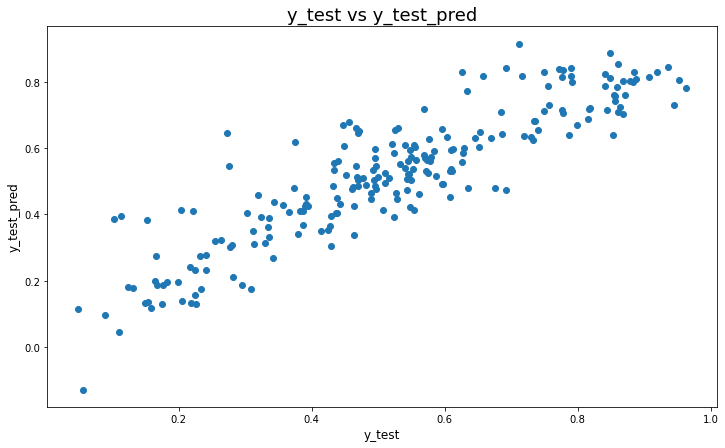

In [76]:
#Plot a scatter plot 

plt.figure(figsize=(12, 7))
plt.scatter(y_test, y_test_pred)
plt.title('y_test vs y_test_pred', fontsize = 18)    #Give a title to the plot
plt.xlabel('y_test', fontsize = 12)                  #X-label of the plot
plt.ylabel('y_test_pred', fontsize = 12)             #Y-label of the plot
plt.show()

Now, let's get the equation of the bestfit line

$$count = 0.232 \times year + 0.522 \times temp - 0.152 \times windspeed + 0.102 \times Summer + 0.137 \times Winter + 0.053 \times Aug + 0.112 \times Sep - 0.045 \times Sun - 0.282 \times LightSnow - 0.082 \times MistyCloudy$$

# Interpretation

So we gotta best-fit line up over there! Now let's interpret it.

- When **year** increases by 1 unit, the bike rentals increase by 0.232
- When **temp** increase by 1 unit, the bike rentals increase by 0.522
- When **Summer** increase by 1 unit, the count increase by 0.102
- When **Winter** increase by 1 unit, the rentals increase by 0.137
- When **Aug and Sep** increase by 1 unit, the rentals increase by 0.053 and 0.112 each

Similarly, the rentals decrease by these variables:

- **Windspeed**, **Sun**, **Light_Snow**, **Misty_Cloudy**

# Recommendations

Here are the recommendations for the BoomBikes to meet their business goals.

- Consider the **temp**. Good temperature means good business for you! Have a weather forecast to handle the demand   for the bike rentals
- Cash in on **Winter**, **Sep**, **Summer**
- **Year** is a plus point. Before the Pandemic, the rentals increase from 2018 to 2019. If there were no Pandemic,   the rentals would have increased in 2020, 2021, and so on. Because the developed countries like U.S. have more   
  bike-friendly policies and people have become more environmental-conscious.

But, here is a catch for you!

- Becareful about these weather negative influences like **windspeed**, **Light_Snow**, **Misty_Cloudy** because  
  they hamper biking. So people won't show much interest in getting a bike.
- **Sun**day is a dampener for the bike rentals. As the U.S. is a Christian country, they spend time on 
  church-going or spending time with the family.
